# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
Cardiovascular diseases are the leading cause of death worldwide, claiming approximately 17.9 million lives each year and accounting for 31% of all deaths.Heart failure is a common occurrence caused by lardiovascular disease, and this data set contains 12 features that can be used to predict death from heart failure.

Most cardiovascular diseases can be prevented by addressing behavioral risk factors throughout the population, such as tobacco use, unhealthy diets and obesity, a lack of physical activity, and harmful alcohol use. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or pre-existing diseases)

# The Objective
- Create a model to predict the likelihood of a patient dying from heart failure.
- This is a binary classification problem because the target class (death) consists of two classes. Is it true or false? 

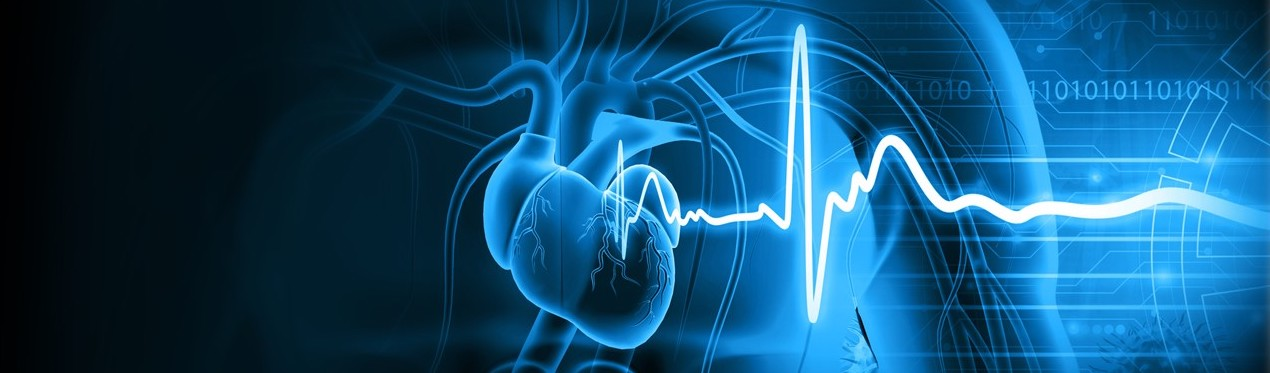

In [51]:
Image(filename='Heart failure.jpg') 

# A. Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

import phik
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# B. Data Loading

In [3]:
# Load dataset
df = pd.read_csv('Heart_failure_predict_and_analysis.csv')

# Change options so that the entire column can be displayed
pd.set_option('display.max_columns', None)

In [4]:
# Look at the data heads
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [5]:
# Display the last 5 rows of data
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


### B1. Data information

In [6]:
# Show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Information data shows the full set of basic information data
- There are two data types (float64(3) and int64(10))
- 13 columns
- 299 row
- there is no visible missing value 

In [7]:
# Describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


- No anomalies were found in the data.

In [8]:
# Defining the value of each column.
print("All columns Unique values count")
for col in df:
    print(col, len(df[col].unique()), sep=': ')

All columns Unique values count
age: 47
anaemia: 2
creatinine_phosphokinase: 208
diabetes: 2
ejection_fraction: 17
high_blood_pressure: 2
platelets: 176
serum_creatinine: 40
serum_sodium: 27
sex: 2
smoking: 2
time: 148
DEATH_EVENT: 2


- Some columns have binary data
- anemia, diabetes, hypertension, sex, smoking, and a fatal event
- and these columns also have their values encoded.

### B2. Data Cleaning
*In this section, data cleaning will be done.*

**Handling Missing Value**

In [9]:
# Sum the missing values of each column.
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No missing value was found in the data.

**Handling Duplicated Data**

In [10]:
# checking for duplicate data
df.duplicated().sum()

0

No duplicated data was found in the data.

# C. Exploratory Data Analysis
*exploring data*

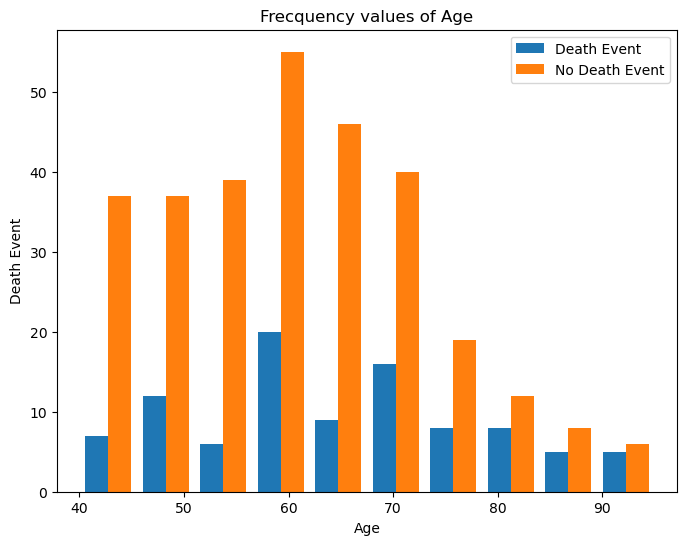

In [11]:
age1 = df[df['DEATH_EVENT'] == 1].age
age = df.age

plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Death Event')
plt.hist([age1, age], label=['Death Event', 'No Death Event'])
plt.title('Frecquency values of Age')
plt.legend()

- Patients with the most death event presentations ranged in age from 60 to 70 years.
- Then, after 80 or 90 years of bias, the author assumed the data in his possession was still insufficient to describe this percentage of the year. If you look at the presentation, it is very large; for example, at the age of 90, about 90 percent of the death event.

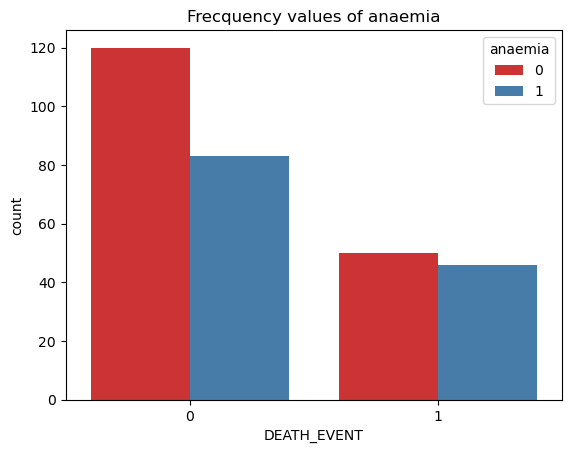

In [12]:
sns.countplot(x ='DEATH_EVENT', hue = "anaemia", data = df, palette = "Set1")
plt.title('Frecquency values of anaemia')
plt.show()

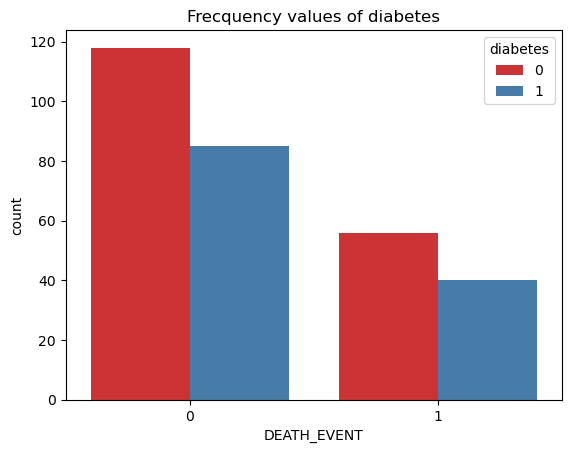

In [13]:
sns.countplot(x ='DEATH_EVENT', hue = "diabetes", data = df, palette = "Set1")
plt.title('Frecquency values of diabetes')
plt.show()

- It has been discovered that anemia and diabetes have no significant impact on heart failure.
- This is good news, but a healthy lifestyle must be maintained and considered.

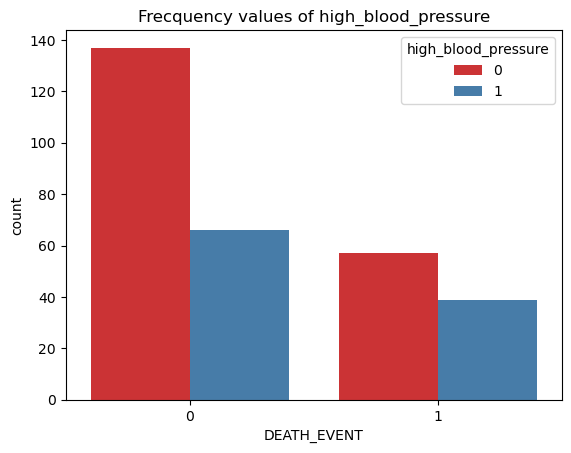

In [14]:
sns.countplot(x ='DEATH_EVENT', hue = "high_blood_pressure", data = df, palette = "Set1")
plt.title('Frecquency values of high_blood_pressure')
plt.show()

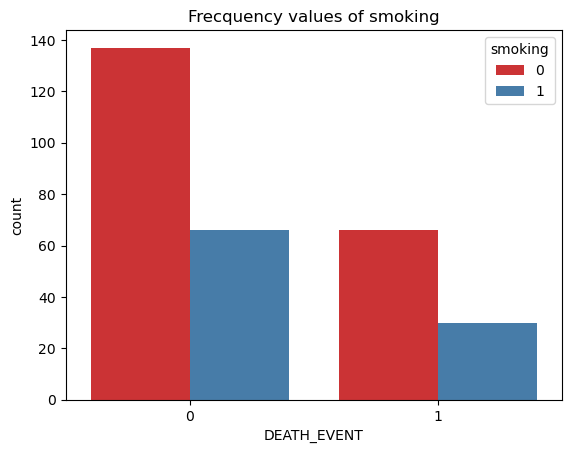

In [15]:
sns.countplot(x ='DEATH_EVENT', hue = "smoking", data = df, palette = "Set1")
plt.title('Frecquency values of smoking')
plt.show()

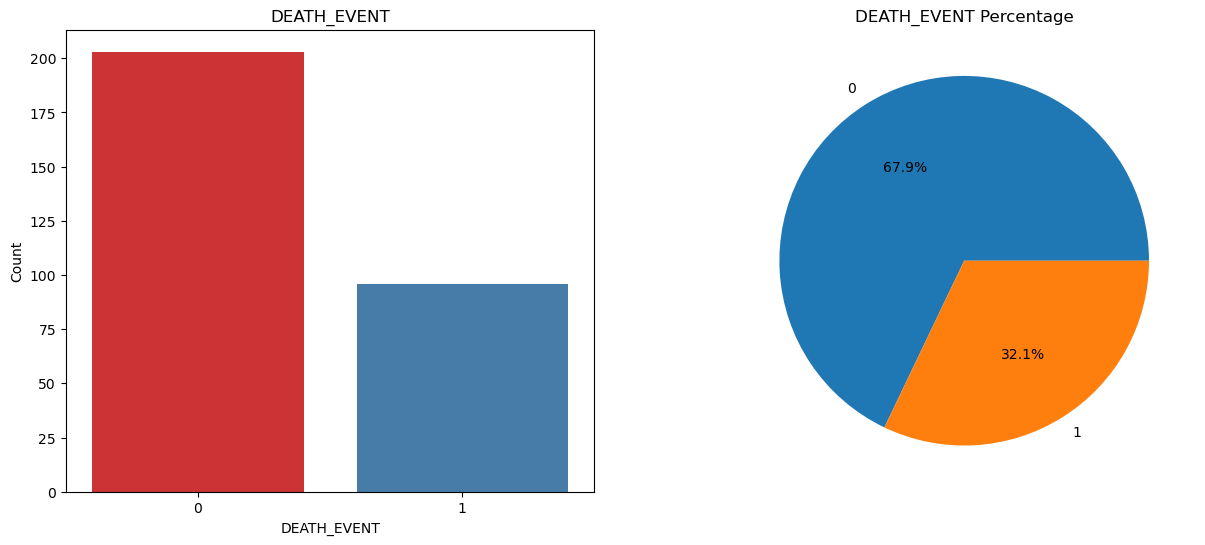

In [16]:
# Create a CountPlot graph for the target column.

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='DEATH_EVENT', data=df, palette = "Set1")
plt.title('DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(df.DEATH_EVENT.value_counts(), labels=df.DEATH_EVENT.value_counts().index, autopct='%1.1f%%')
plt.title('DEATH_EVENT Percentage')
plt.show()

The percentage of patients who are notorious for heart failure is 32.1 percent; this data is quite a lot when compared to the total data, which is that one-third of patients have experienced heart failure.
- A quick follow-up needs to be done to lower future risks.
- We're going to make a model of the solution to this problem. 

# D. Data Preprocessing
*This section contains data preparation for modeling.*

### D1. Heatmap Corelation
*Look for the correlation of each feature with the target to determine which feature to use.*

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


<AxesSubplot:>

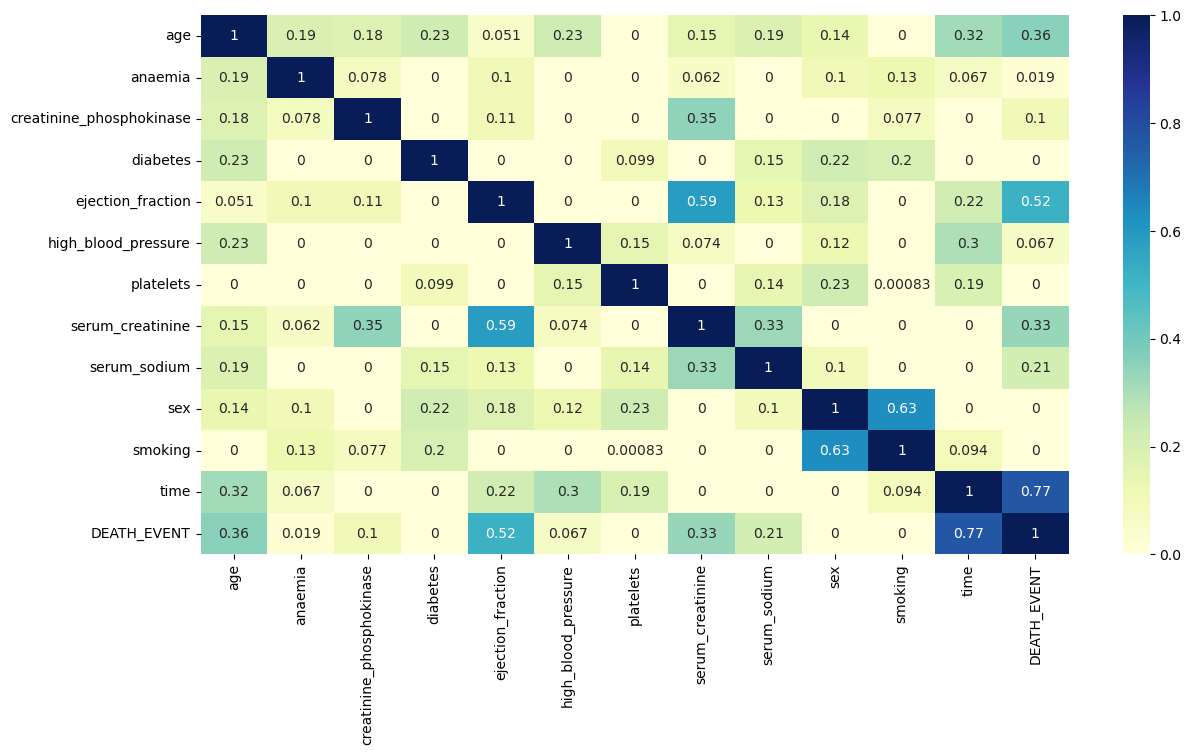

In [17]:
# Plot correlation coefficients between data columns.
plt.figure(figsize=(14,7))
sns.heatmap(df.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

It turns out that there are things that greatly affect the patient's condition in the future, whether they die or not.
- Wow, this really should be avoided or minimized, i.e., time, ejection fraction, age, creatinine serum, and sodium serum.

### D2. Feature Selection
*Selection of features used*

In [18]:
# Selection of features based on the correlation.
data = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']]
data.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,42.0,15,1.3,136,65,1
1,46.0,17,2.1,124,100,1
2,65.0,20,2.7,116,8,1
3,53.0,20,1.4,139,43,1
4,50.0,20,1.0,134,186,0


In [19]:
data.shape

(299, 6)

### D3. Checking outlier

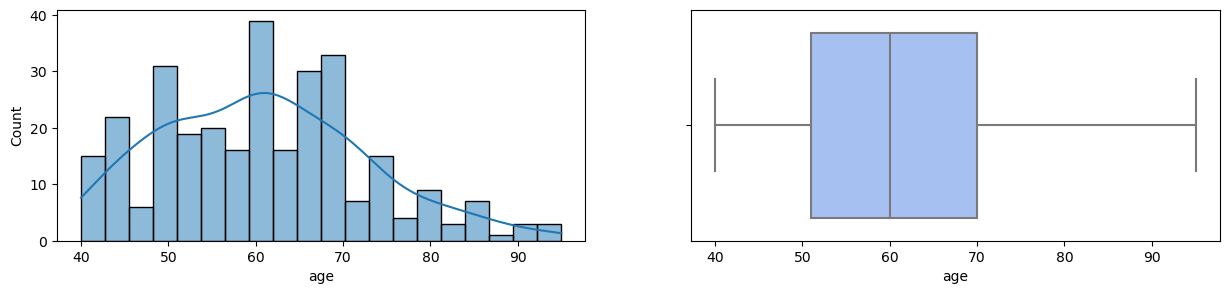

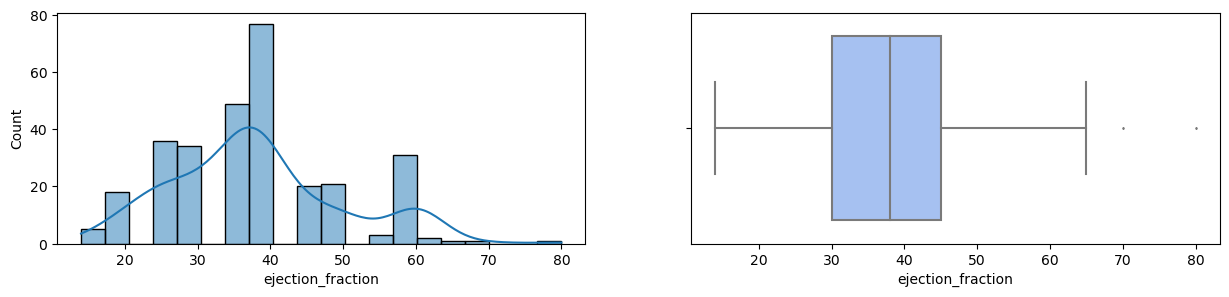

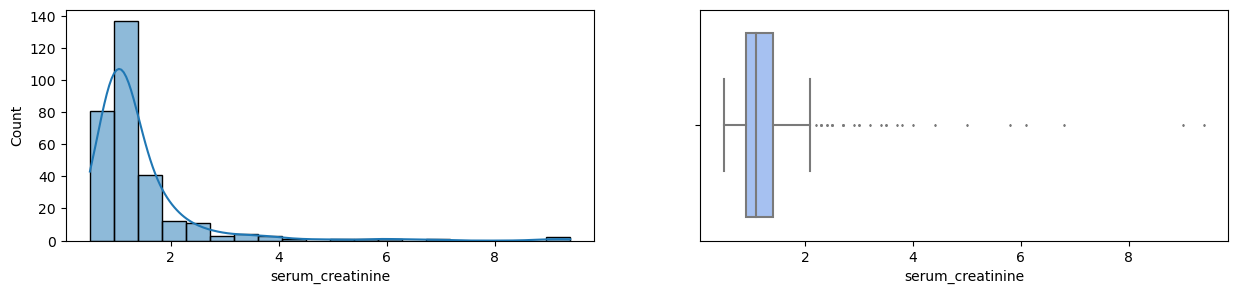

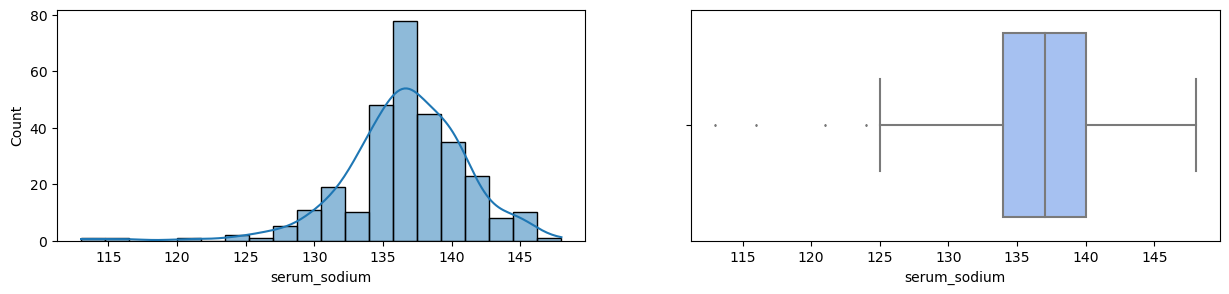

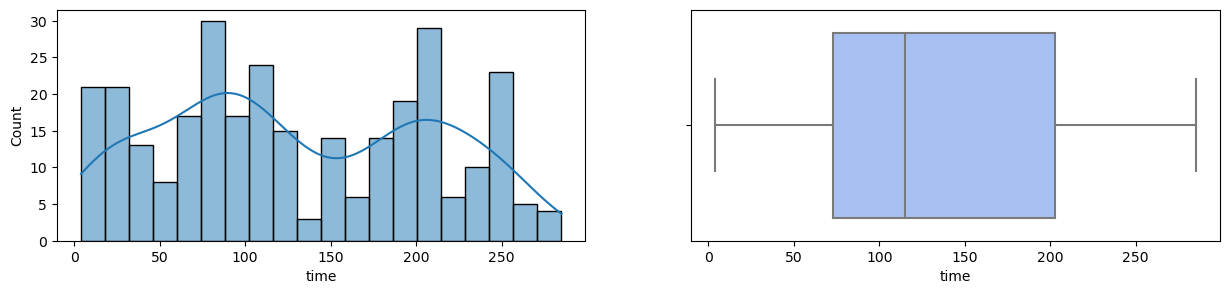

In [20]:
# Create functions to display the histogram and box plot.
num_col = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

There were no outliers in feature age or time.

for ejection fraction, creatinine serum, and sodium serum. Capping will be done with the goal of keeping the data read by the model varied and the amount of data sufficient for the learning model. 

### D4. Handing Outlier

- The method used is IQR.

In [21]:
features_with_outliers = ['ejection_fraction', 'serum_creatinine', 'serum_sodium']
for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

In [22]:
data.shape

(299, 6)

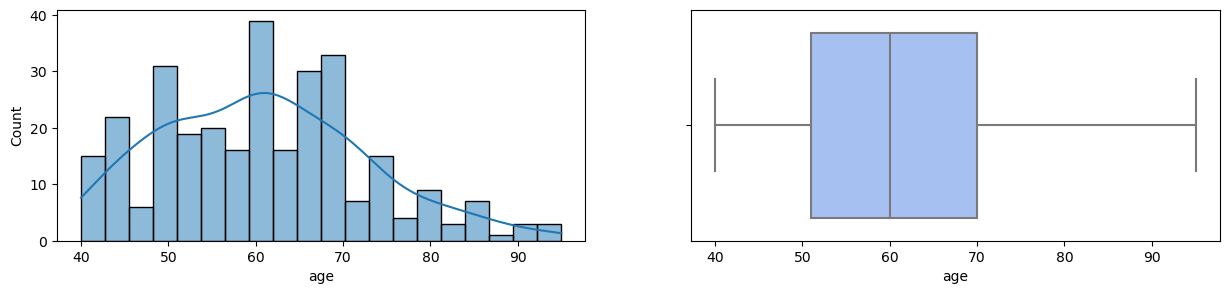

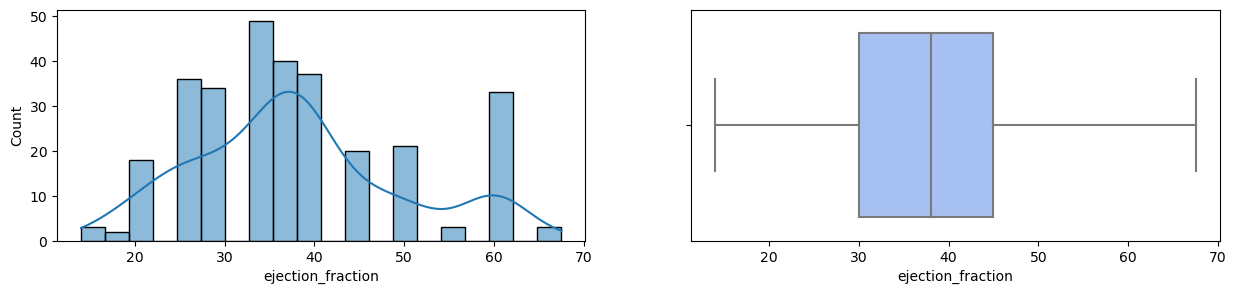

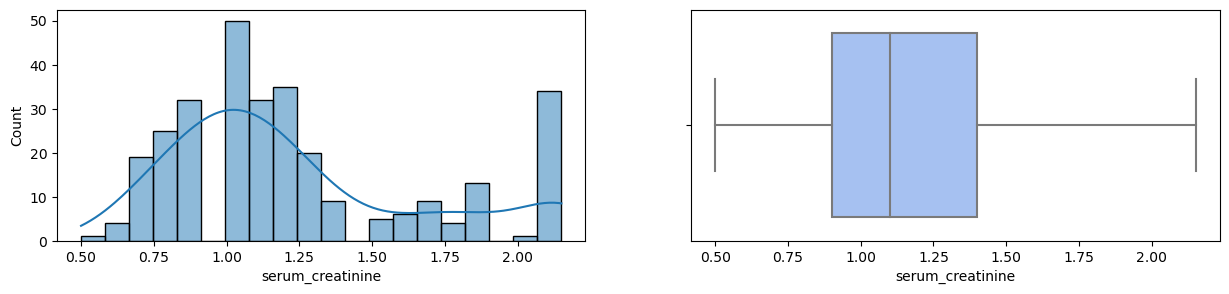

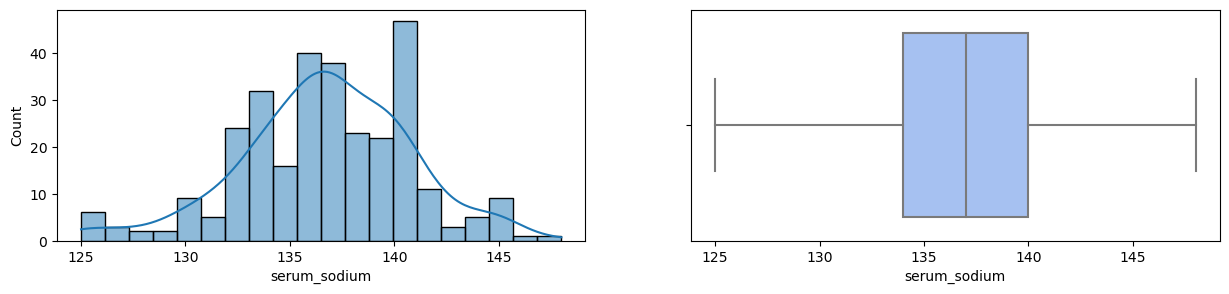

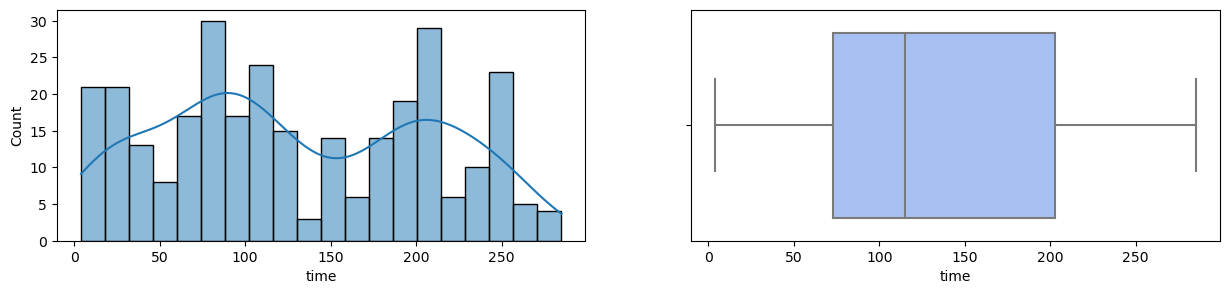

In [23]:
num_col = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

In [24]:
data.shape

(299, 6)

### D5. Split Data
*There will be a separation of data inference, data training, and data testing.*

In [25]:
# Retrieving inference data.
df_inf = data.sample(10, random_state=41)

# Separating inf data from datasets.
df_train_test = data.drop(df_inf.index)

# Reset indexes for both data sets.
df_inf.reset_index(drop=True, inplace=True)
df_train_test.reset_index(drop=True, inplace=True)

In [26]:
# train_test_split
# separating training and test data.
train, test = train_test_split(df_train_test, test_size=0.3, random_state=41)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (202, 6)
Test size:  (87, 6)


- Because there was little data, only 10 inference data were retrieved.
- Inference data is dropped so that the data is not studied by the model.
- and the training test data was divided 70:30. 

### D6. Split Feature dan Target

In [27]:
# Splitting feature data and target predict
X_train = train.drop(columns='DEATH_EVENT')
y_train = train['DEATH_EVENT']

X_test = test.drop(columns='DEATH_EVENT')
y_test = test['DEATH_EVENT']

In [28]:
# Show X_train
X_train.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time
188,55.0,35.0,1.0,140,206
195,60.0,35.0,1.4,139,258
191,40.0,35.0,1.0,142,214
205,60.0,38.0,0.6,138,40
50,67.0,38.0,1.2,133,245


### D7. Handling imbalance data

Text(0.5, 1.0, 'Target Imbalanced')

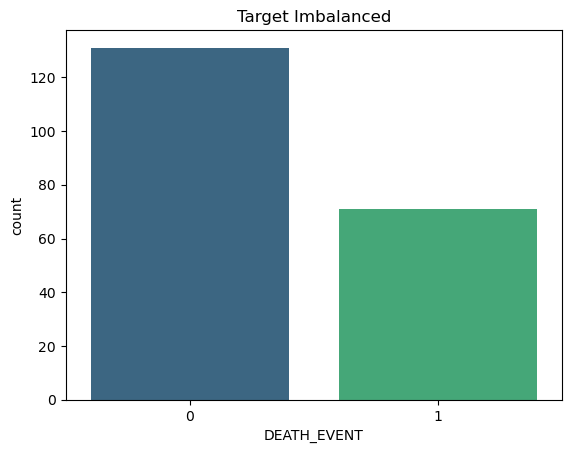

In [29]:
# Show the target data barplot. 
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Imbalanced')

In [30]:
# Handling Imbalance Data on Train Data
smote = SMOTE(sampling_strategy='minority')
X_train ,y_train = smote.fit_resample(X_train ,y_train)

print(X_train.shape ,y_train.shape)

(262, 5) (262,)


Text(0.5, 1.0, 'Target Balanced')

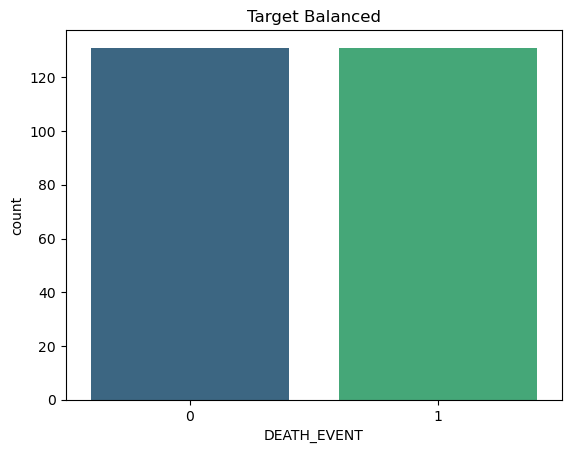

In [31]:
# Display a bar plot to see the results of the changes.
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Balanced')

- The handling of the data imbalance has been completed; in fact, the data is not extremely imbalanced. As a result, the data can be balanced or left.
- The author performs balancing with the aim of applying the knowledge that has been studied.

### D8. Feature Scalling

In [32]:
# Using StandardScaler, scale data X_train and X_test
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.61668784, -0.22295964, -0.61655374,  0.82850648,  1.26092001],
       [-0.2213902 , -0.22295964,  0.30223654,  0.59153192,  1.93669099],
       [-1.80258075, -0.22295964, -0.61655374,  1.3024556 ,  1.36488477],
       ...,
       [ 0.56920508,  0.61072684, -0.10991319,  0.35455736, -1.01330927],
       [ 2.04504096,  0.11981893,  0.68574028, -0.35636632, -1.28621678],
       [ 0.92111242, -1.47348936,  0.67075583, -0.35636632, -0.72740616]])

In [33]:
# Create a dataframe for X_train final

X_traindf = pd.DataFrame(X_train)
X_traindf

,0,1,2,3,4
0,-0.616688,-0.222960,-0.616554,0.828506,1.260920
1,-0.221390,-0.222960,0.302237,0.591532,1.936691
2,-1.802581,-0.222960,-0.616554,1.302456,1.364885
3,-0.221390,0.027146,-1.535344,0.354557,-0.896349
4,0.332026,0.027146,-0.157159,-0.830315,1.767748
...,...,...,...,...,...
257,0.546532,-0.937103,-0.649490,0.828506,-1.221239
258,0.620285,-1.473489,1.337426,-0.830315,-1.013309
259,0.569205,0.610727,-0.109913,0.354557,-1.013309
260,2.045041,0.119819,0.685740,-0.356366,-1.286217


- Scaling is done so that the model can learn well because, while the data is numerical, the range in each feature varies.
- This scaling is done to homogenize the range of the data.

# E. Modelling
*Use the default parameters for modeling.*

In [34]:
# Random Forest
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

model random forest adalah salah satu model terbaik (tree base), begitu juga xgboost.
kita akan melakukan modelling pada best model ini

# F. Model Training Test

In [36]:
# Random Forest
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

# XGBoost
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

# G. Model Evaluation

In [37]:
# Random Forest evaluation
print("="*20,"Random Forest","="*20)
print("\n")

y_prob_train = rf.predict_proba(X_train)[:,1]
y_prob_test = rf.predict_proba(X_test)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== Random Forest ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       131

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262

ROC-AUC Score Train: 1.0


========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        64
           1       0.70      0.83      0.76        23

    accuracy                           0.86        87
   macro avg       0.82      0.85      0.83        87
weighted avg       0.87      0.86      0.87        87

ROC-AUC Score Test: 0.8980978260869564


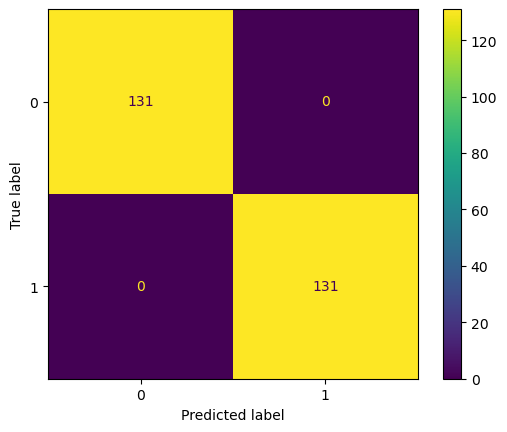

In [38]:
cm = confusion_matrix(y_train, y_pred_train_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [39]:
# XGBoost evaluation
print("="*20,"XGBoost","="*20)
print("\n")

y_prob_train = xgb.predict_proba(X_train)[:,1]
y_prob_test = xgb.predict_proba(X_test)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_xgb, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_xgb, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== XGBoost ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       131

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262

ROC-AUC Score Train: 1.0


========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        64
           1       0.66      0.83      0.73        23

    accuracy                           0.84        87
   macro avg       0.79      0.83      0.81        87
weighted avg       0.86      0.84      0.84        87

ROC-AUC Score Test: 0.8831521739130435


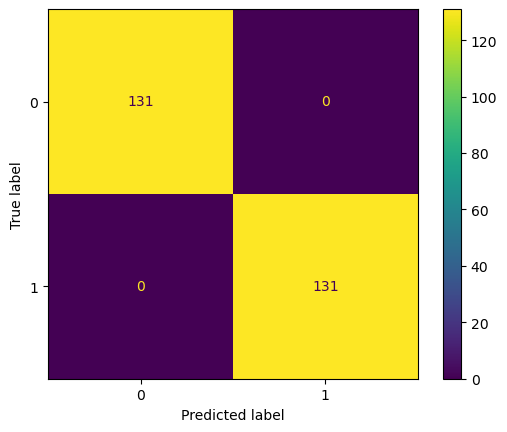

In [40]:
cm = confusion_matrix(y_train, y_pred_train_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

disp.plot()
plt.show()

- The best model found by default is Random Forest with ROC_AUC train 1 and test 0.89.
- It is also very good for recall and precision.The model can fully distinguish the data.
- But what is noted is the overfit model, the model of learning too well from this data train, as depicted by its different test values.

## GridSearch CV

In [41]:
params = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

In [42]:
from sklearn.model_selection import GridSearchCV
dt= RandomForestClassifier(random_state=1)
dt_grid = GridSearchCV(dt, params, cv=3, scoring='accuracy', return_train_score=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             return_train_score=True, scoring='accuracy')

In [43]:
print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
best score: 0.8970306513409962


In [44]:
dt_best = dt_grid.best_estimator_
print(dt_best)

RandomForestClassifier(criterion='entropy', random_state=1)


In [45]:
y_pred_train2 = dt_best.predict(X_train)
print('roc_auc train: ', roc_auc_score(y_train, y_pred_train2))

y_pred_test2 = dt_best.predict(X_test)
print('roc_auc test: ', roc_auc_score(y_test, y_pred_test2))

roc_auc train:  1.0
roc_auc test:  0.8427309782608696


- overfit model
- After tuning the hyperparameters, the model does not improve and its roc_auc value decreases. 

# Data Inference

In [46]:
df_inf

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,70.0,35.0,1.10,134,208,0
1,45.0,38.0,0.90,140,244,0
2,63.0,60.0,1.20,145,147,0
3,73.0,35.0,1.30,134,195,0
4,45.0,30.0,1.10,137,11,1
5,62.0,60.0,0.90,139,117,0
6,49.0,30.0,1.00,138,12,0
7,51.0,25.0,0.90,130,38,1
8,45.0,55.0,0.80,141,257,0
9,60.0,25.0,2.15,136,187,0


In [47]:
X_inf = df_inf.drop(columns='DEATH_EVENT')
y_inf = df_inf['DEATH_EVENT']

In [48]:
data_inf_final = scaler.transform(X_inf)
data_inf_final

array([[ 0.56920508, -0.22295964, -0.38685617, -0.59334088,  1.2869112 ],
       [-1.40728311,  0.0271463 , -0.84625131,  0.82850648,  1.75475265],
       [ 0.01578838,  1.86125655, -0.1571586 ,  2.01337928,  0.49417985],
       [ 0.80638366, -0.22295964,  0.07253897, -0.59334088,  1.11796845],
       [-1.40728311, -0.63980288, -0.38685617,  0.1175828 , -1.27322118],
       [-0.06327114,  1.86125655, -0.84625131,  0.59153192,  0.10431198],
       [-1.091045  , -0.63980288, -0.61655374,  0.35455736, -1.26022559],
       [-0.93292595, -1.05664612, -0.84625131, -1.54123913, -0.92234009],
       [-1.40728311,  1.44441332, -1.07594887,  1.06548104,  1.9236954 ],
       [-0.2213902 , -1.05664612,  2.02496831, -0.11939176,  1.01400369]])

In [49]:
# predict inference data with a random forest model

y_pred_inf_dt = rf.predict(data_inf_final)
y_pred_inf_df_dt = pd.DataFrame(y_pred_inf_dt, columns=['model_predict'])
y_pred_inf_df_dt

,model_predict
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,1
8,0
9,1


In [50]:
pd.concat([df_inf, y_pred_inf_df_dt], axis=1)

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT,model_predict
0,70.0,35.0,1.10,134,208,0,0
1,45.0,38.0,0.90,140,244,0,0
2,63.0,60.0,1.20,145,147,0,0
3,73.0,35.0,1.30,134,195,0,0
4,45.0,30.0,1.10,137,11,1,1
5,62.0,60.0,0.90,139,117,0,0
6,49.0,30.0,1.00,138,12,0,1
7,51.0,25.0,0.90,130,38,1,1
8,45.0,55.0,0.80,141,257,0,0
9,60.0,25.0,2.15,136,187,0,1


# Summary

The model can sort the data well.
- On average, the model can predict that 90 percent of the data is correct.
- with its relatively small error value
- The best model for this data is that this random forest is attested by the Defaul model.
- The authors attempted to find data imbalance before balancing the data; the result was that the balanced data improved the model slightly.
- It is also worth noting that more data needs to be processed in the hope of achieving optimal model learning.
- **SMOTE treatment of the data makes the model data excellent for studying the training data but poor for studying the test data. In the advanced stage, it must be analyzed and improved so that the model can learn the same from both training and test data.**



*End Game*

**If this model has been refined, then medical personnel can use this model to determine the impact of heart failure patients. This will be very useful for early-stage screening in the healthcare industry.**